In [52]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
pd.set_option('display.max_rows',500)

# 4.1 Initial Data Preparation

In [4]:
data_path = '/home/shreeka/Enterprise Data Science/covid-19 project/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data = pd.read_csv(data_path)

In [5]:
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


In [9]:
raw_data.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '8/24/20', '8/25/20', '8/26/20', '8/27/20', '8/28/20', '8/29/20',
       '8/30/20', '8/31/20', '9/1/20', '9/2/20'],
      dtype='object', length=225)

In [12]:
time_idx = raw_data.columns[4:]

In [70]:
df_plot = pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [23]:
raw_data['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [35]:
raw_data[raw_data['Country/Region']=='Canada'].iloc[:,4:].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         1
1/27/20         1
1/28/20         2
1/29/20         2
1/30/20         2
1/31/20         4
2/1/20          4
2/2/20          4
2/3/20          4
2/4/20          4
2/5/20          5
2/6/20          5
2/7/20          7
2/8/20          7
2/9/20          7
2/10/20         7
2/11/20         7
2/12/20         7
2/13/20         7
2/14/20         7
2/15/20         7
2/16/20         7
2/17/20         8
2/18/20         8
2/19/20         8
2/20/20         8
2/21/20         9
2/22/20         9
2/23/20         9
2/24/20        10
2/25/20        11
2/26/20        11
2/27/20        13
2/28/20        14
2/29/20        20
3/1/20         24
3/2/20         27
3/3/20         30
3/4/20         33
3/5/20         37
3/6/20         49
3/7/20         54
3/8/20         64
3/9/20         77
3/10/20        79
3/11/20       108
3/12/20       117
3/13/20       193
3/14/20       198
3/15/20       252
3/16/20       415
3/17/20   

In [71]:
country_list=['Nepal',
              'US',
              'China',
              'Germany',
              'Korea, South',
             ]

In [72]:
for country in country_list:
    df_plot[country]=np.array(raw_data[raw_data['Country/Region']==country].iloc[:,4::].sum(axis=0))

In [73]:
df_plot

,date,Nepal,US,China,Germany,"Korea, South"
0,2020-01-22,0,1,548,0,1
1,2020-01-23,0,1,643,0,1
2,2020-01-24,0,2,920,0,2
3,2020-01-25,1,2,1406,0,2
4,2020-01-26,1,5,2075,0,3
5,2020-01-27,1,5,2877,1,4
6,2020-01-28,1,5,5509,4,4
7,2020-01-29,1,5,6087,4,4
8,2020-01-30,1,5,8141,4,4
9,2020-01-31,1,7,9802,5,11


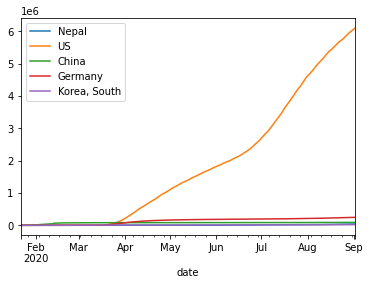

In [74]:
%matplotlib inline
df_plot.set_index('date').plot()

# 4.2 Conversion Date Object

In [75]:
df_plot.head()

,date,Nepal,US,China,Germany,"Korea, South"
0,2020-01-22,0,1,548,0,1
1,2020-01-23,0,1,643,0,1
2,2020-01-24,0,2,920,0,2
3,2020-01-25,1,2,1406,0,2
4,2020-01-26,1,5,2075,0,3


In [82]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [56]:
df_plot['date'] = time_idx

In [85]:
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [86]:
df_plot.head()

,date,Nepal,US,China,Germany,"Korea, South"
0,2020-01-22,0,1,548,0,1
1,2020-01-23,0,1,643,0,1
2,2020-01-24,0,2,920,0,2
3,2020-01-25,1,2,1406,0,2
4,2020-01-26,1,5,2075,0,3


In [87]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

# 4.3 Relational data structure

In [89]:
data_path = '/home/shreeka/Enterprise Data Science/covid-19 project/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


In [101]:
pd_data_base = raw_data.rename(columns={'Country/Region':'country','Province/State':'state'})

In [103]:
pd_data_base['state']=pd_data_base['state'].fillna('no state') 

In [106]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis = 1)

In [107]:
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,no state,Afghanistan,0,0,0,0,0,0,0,0,...,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243
1,no state,Albania,0,0,0,0,0,0,0,0,...,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728
2,no state,Algeria,0,0,0,0,0,0,0,0,...,41858,42228,42619,43016,43403,43781,44146,44494,44833,45158
3,no state,Andorra,0,0,0,0,0,0,0,0,...,1060,1060,1098,1098,1124,1124,1124,1176,1184,1199
4,no state,Angola,0,0,0,0,0,0,0,0,...,2222,2283,2332,2415,2471,2551,2624,2654,2729,2777


In [110]:
pd_test = pd_data_base.set_index(['state','country']).T

In [118]:
pd_test.head()

state      no state                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   

state                     Australian Capital Territory New South Wales  ...  \
country Argentina Armenia                    Australia       Australia  ...   
1/22/20         0       0                            0               0  ...   
1/23/20         0       0                            0               0  ...   
1/24/20         0       0                            0               0  ...   
1/25/20         0       0                            0               0  ...   
1/26/20         0       0                            0               3  ...   

state         no state                                       \
country United Kingdom Uruguay Uzbekistan Venezuela Vietnam   
1/22/20              0       0          0         0       0   
1/23/20              0       0          0         0       2   
1/24/20              0       0          0         0       2   
1/25/20              0       0          0         0       2   
1/26/20              0       0          0         0       2   

state                                                            
country West Bank and Gaza Western Sahara Yemen Zambia Zimbabwe  
1/22/20                  0              0     0      0        0  
1/23/20                  0              0     0      0        0  
1/24/20                  0              0     0      0        0  
1/25/20                  0              0     0      0        0  
1/26/20                  0              0     0      0        0  

[5 rows x 266 columns]

In [120]:
pd_test.stack(level = [0,1]).reset_index()

,level_0,state,country,0
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0
...,...,...,...,...
59845,9/2/20,no state,West Bank and Gaza,23875.0
59846,9/2/20,no state,Western Sahara,10.0
59847,9/2/20,no state,Yemen,1976.0
59848,9/2/20,no state,Zambia,12415.0


In [121]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [122]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [124]:
pd_relational_model.date=pd_relational_model.date.astype('datetime64[ns]')
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

In [125]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed             int64
dtype: object

In [126]:
pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

# Add US states information

In [127]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,633,628,616,614,620,624,628,628,629,617
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,510,511,513,515,517,523,533,535,538,541
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,946,967,968,979,983,1004,1025,1034,1045,1036


In [128]:
pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)

In [130]:
pd_data_base_US = pd_raw_US.rename(columns={'Province_State':'state'})

In [131]:
pd_data_base_US.head()

,state,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20
0,Alabama,0,0,0,0,0,0,0,0,0,...,1286,1286,1281,1284,1296,1309,1345,1348,1354,1345
1,Alabama,0,0,0,0,0,0,0,0,0,...,4083,4100,4166,4199,4230,4307,4402,4422,4445,4458
2,Alabama,0,0,0,0,0,0,0,0,0,...,633,628,616,614,620,624,628,628,629,617
3,Alabama,0,0,0,0,0,0,0,0,0,...,510,511,513,515,517,523,533,535,538,541
4,Alabama,0,0,0,0,0,0,0,0,0,...,946,967,968,979,983,1004,1025,1034,1045,1036


In [137]:
pd_data_base_US.set_index('state').T.stack().reset_index()

,level_0,state,0
0,1/22/20,Alabama,0
1,1/22/20,Alabama,0
2,1/22/20,Alabama,0
3,1/22/20,Alabama,0
4,1/22/20,Alabama,0
...,...,...,...
751495,9/2/20,Wyoming,433
751496,9/2/20,Wyoming,303
751497,9/2/20,Wyoming,0
751498,9/2/20,Wyoming,109


In [139]:
pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US.head()

,date,state,confirmed
0,1/22/20,Alabama,0
1,1/22/20,Alabama,0
2,1/22/20,Alabama,0
3,1/22/20,Alabama,0
4,1/22/20,Alabama,0


In [140]:
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] # convert to datetime
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [142]:
# update the large relational file
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [144]:
pd_relational_model_all = pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

In [145]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)